In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from itertools import product


In [4]:
df=pd.read_csv('iris_dataset_2D')
X_2D = df[["PC1", "PC2"]].values
y_true = df["label"].values

In [6]:
def purity_score(y_true, y_pred):
    con = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(con, axis=0)) / np.sum(con)

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_2D)
purity_dbscan = purity_score(y_true, dbscan_labels)
print(f"Purity Score for DBSCAN: {purity_dbscan:.4f}")

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_2D)
purity_kmeans = purity_score(y_true, kmeans_labels)
print(f"Purity Score for K_MEANS: {purity_kmeans:.4f}")

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
agg_labels = agg.fit_predict(X_2D)
purity_agg = purity_score(y_true, agg_labels)
print(f"Purity Score for agglomerative: {purity_agg:.4f}")

Purity Score for DBSCAN: 0.6800
Purity Score for K_MEANS: 0.6667
Purity Score for agglomerative: 0.8067


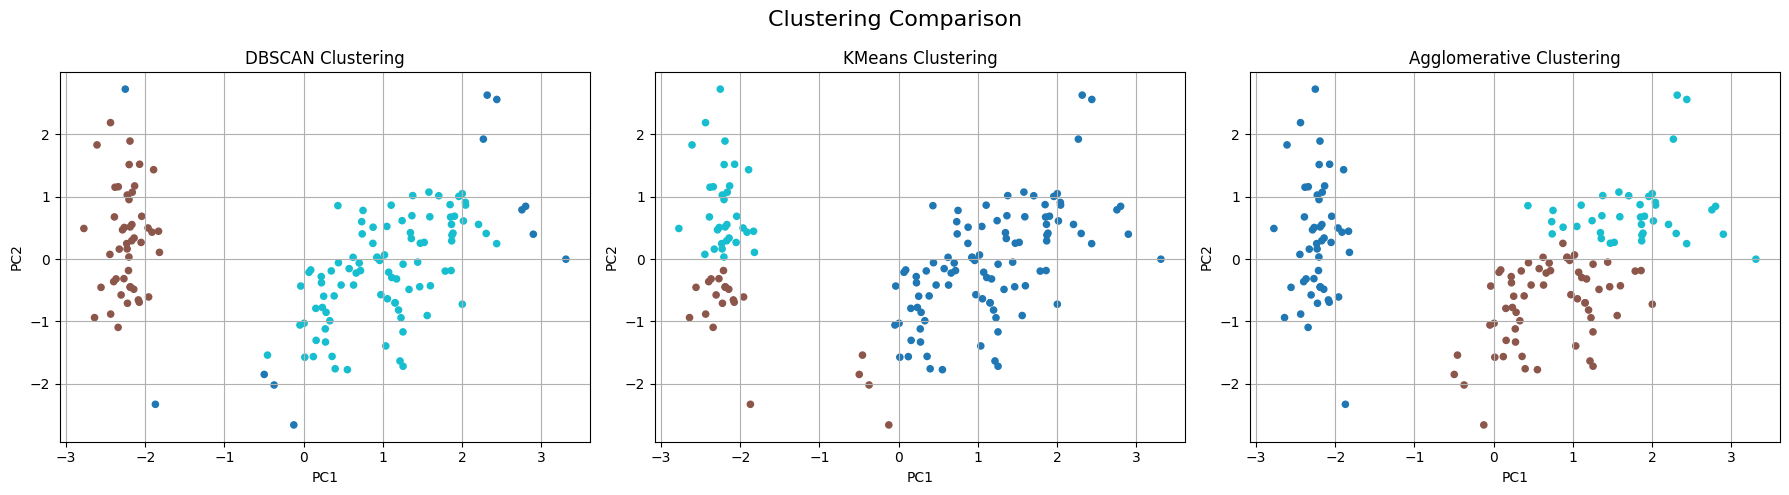

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
methods = ['DBSCAN', 'KMeans', 'Agglomerative']
labels_list = [dbscan_labels, kmeans_labels, agg_labels]

for i in range(3):
    axs[i].scatter(X_2D[:, 0], X_2D[:, 1], c=labels_list[i], cmap='tab10', s=20)
    axs[i].set_title(f"{methods[i]} Clustering")
    axs[i].set_xlabel("PC1")
    axs[i].set_ylabel("PC2")
    axs[i].grid(True)

plt.suptitle("Clustering Comparison", fontsize=16)
plt.tight_layout()
plt.show()


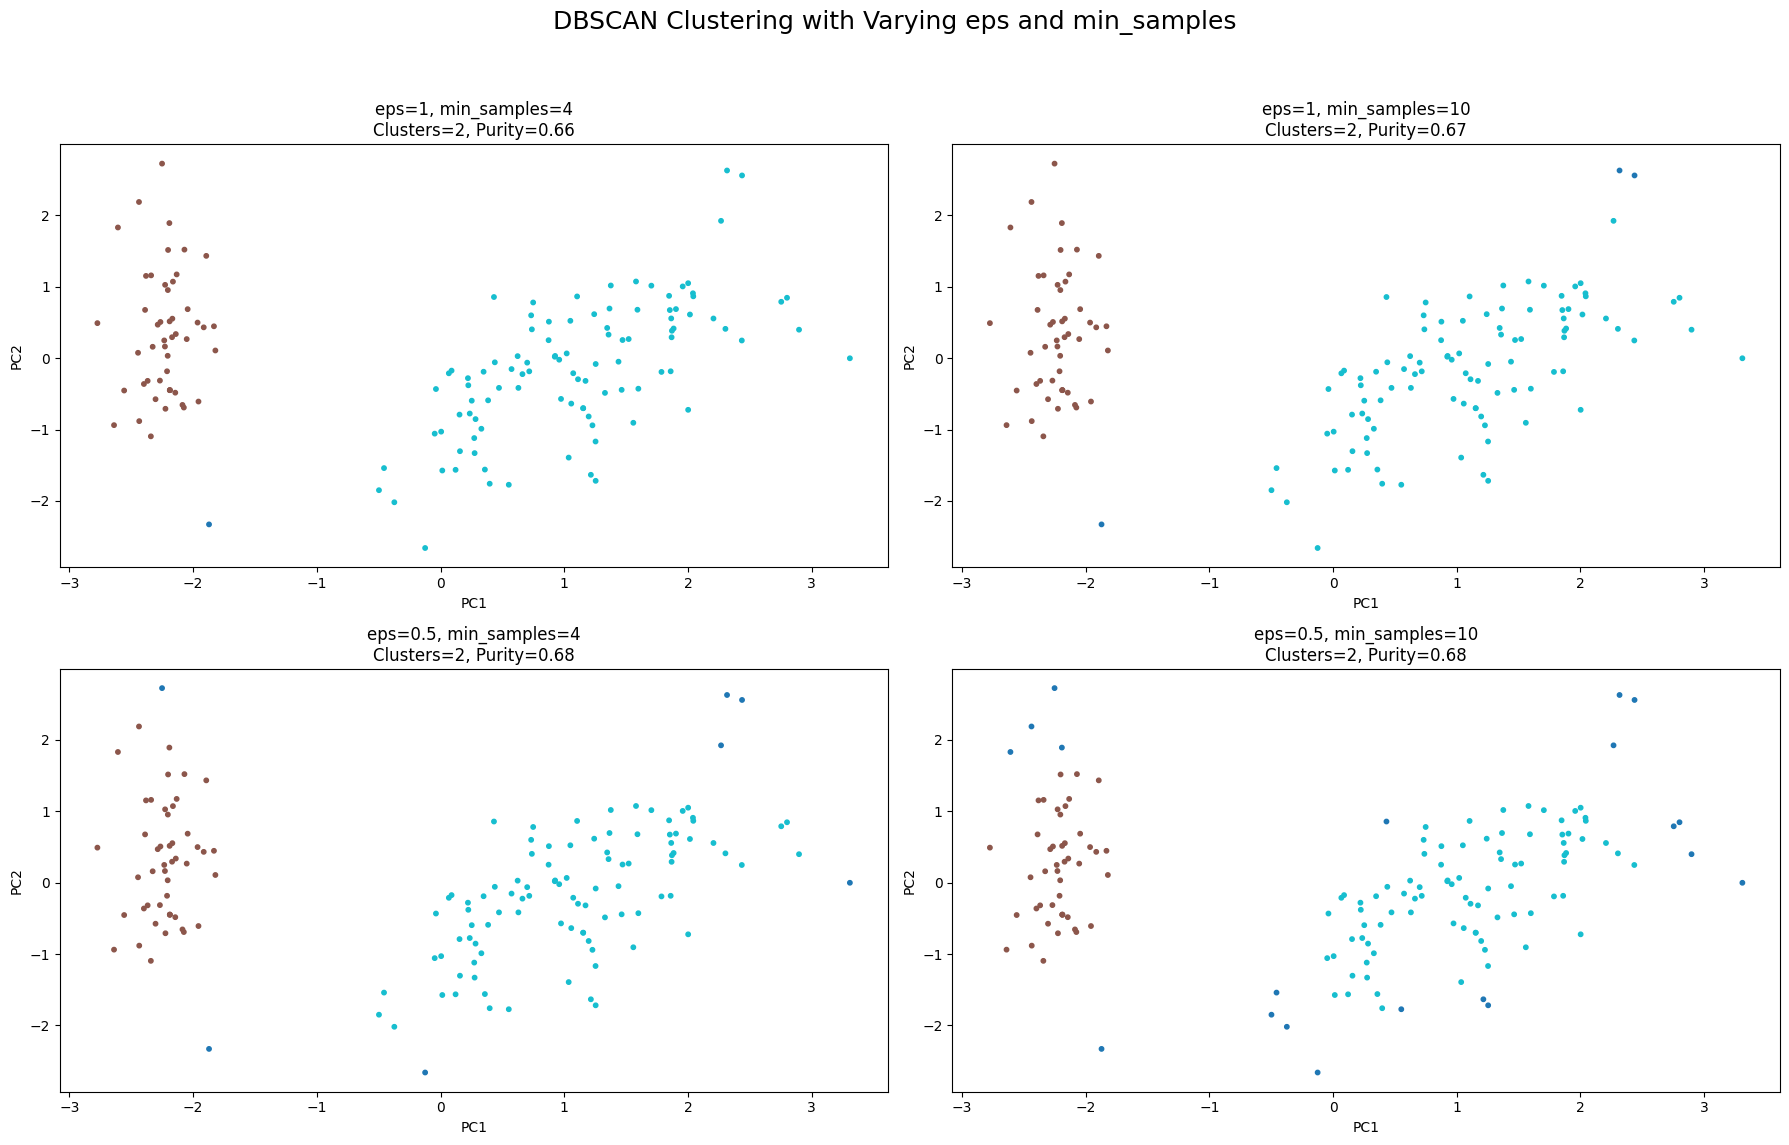

 eps  min_samples  n_clusters   purity
 0.5            4           2 0.678322
 0.5           10           2 0.676923
 1.0           10           2 0.673469
 1.0            4           2 0.664430


In [26]:
def purity_score(y_true, y_pred):
    from scipy.stats import mode

    mask = y_pred != -1  # Ignore noise
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    contingency_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

eps_values = [ 1, 0.5]
min_samples_values = [4,10]


fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(18, 12))
fig.suptitle("DBSCAN Clustering with Varying eps and min_samples", fontsize=18)


results = []


for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_2D)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        purity = purity_score(y_true, labels)

        
        axs[i, j].scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap="tab10", s=10)
        axs[i, j].set_title(f"eps={eps}, min_samples={min_samples}\nClusters={num_clusters}, Purity={purity:.2f}")
        axs[i, j].set_xlabel("PC1")
        axs[i, j].set_ylabel("PC2")

       
        results.append((eps, min_samples, num_clusters, purity))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


result_df = pd.DataFrame(results, columns=["eps", "min_samples", "n_clusters", "purity"])
print(result_df.sort_values(by="purity", ascending=False).to_string(index=False))